In [1]:
# Import python modules
import pandas as pd
import geopandas as gpd
import netCDF4 as nc
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [2]:
# Read netCDF file, and display contents
filename = 'var_dp3r3b1c1h1l1_fort64_subset.nc'
ds = nc.Dataset(filename, 'r')
ds.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     long_name: model time
     standard_name: time
     units: seconds since 2000-09-01 00:00:00
     base_date: 2000-09-01 00:00:00
 unlimited dimensions: time
 current shape = (4,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'x': <class 'netCDF4._netCDF4.Variable'>
 float32 x(node)
     long_name: longitude
     standard_name: longitude
     units: degrees_east
 unlimited dimensions: 
 current shape = (54448,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'y': <class 'netCDF4._netCDF4.Variable'>
 float32 y(node)
     long_name: latitude
     standard_name: latitude
     units: degrees_north
 unlimited dimensions: 
 current shape = (54448,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'depth': <class 'netCDF4._netCDF4.Variable'>
 float64 depth(node)
     long_name: Relative Peak Period
     standard_name: depth_below_geoid
     units: m
 unlimited dimensions: 
 cu

In [3]:
# Extract variables
depth = ds.variables['depth'][:].data
u_vel = ds.variables['u_vel'][:].data
v_vel = ds.variables['v_vel'][:].data
lon = ds.variables['x'][:].data
lat = ds.variables['y'][:].data

In [4]:
# Define lowe left and upper right longitude and latitude coordinates
lllon = min(lon)
lllat = min(lat)
urlon = max(lon)
urlat = max(lat)

# set up basemap chose projection!
m = Basemap(projection = 'merc', resolution='f',llcrnrlon = lllon, llcrnrlat = lllat, urcrnrlon = urlon, urcrnrlat = urlat)
m_lon, m_lat = m(*(lon, lat))

In [5]:
# generate grid data
numcols, numrows = 960, 960
xi = np.linspace(m_lon.min(), m_lon.max(), numcols)
yi = np.linspace(m_lat.min(), m_lat.max(), numrows)
xi, yi = np.meshgrid(xi, yi)

# interpolate, there are better methods, especially if you have many datapoints
zid = griddata((m_lon, m_lat), depth, (xi, yi), method='linear', fill_value=np.nan, rescale=False)
ziu = griddata((m_lon, m_lat), u_vel[3], (xi, yi), method='linear', fill_value=np.nan, rescale=False)
ziv = griddata((m_lon, m_lat), v_vel[3], (xi, yi), method='linear', fill_value=np.nan, rescale=False)

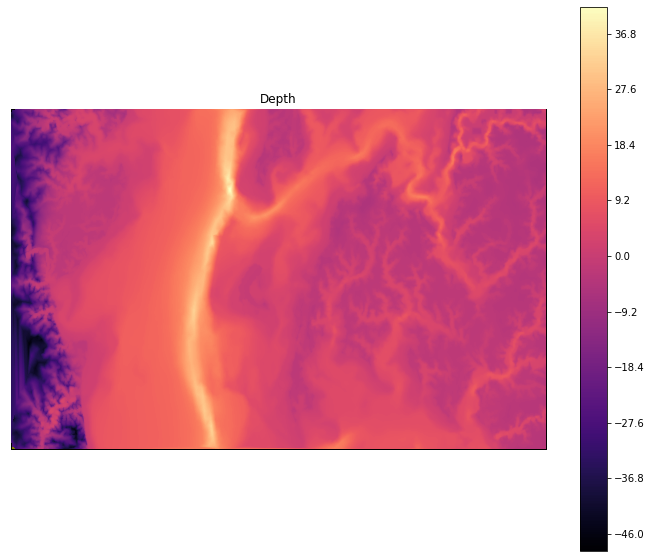

In [6]:
# define fig and ax
fig, ax = plt.subplots(figsize=(12, 10))

# draw map details
m.drawmapboundary(fill_color = 'olive', zorder = 1)

# Plot interpolated depth data
m.contourf(xi, yi, zid, 500, cmap='magma', zorder = 2)
cbar = plt.colorbar()
plt.title('Depth')
plt.show()

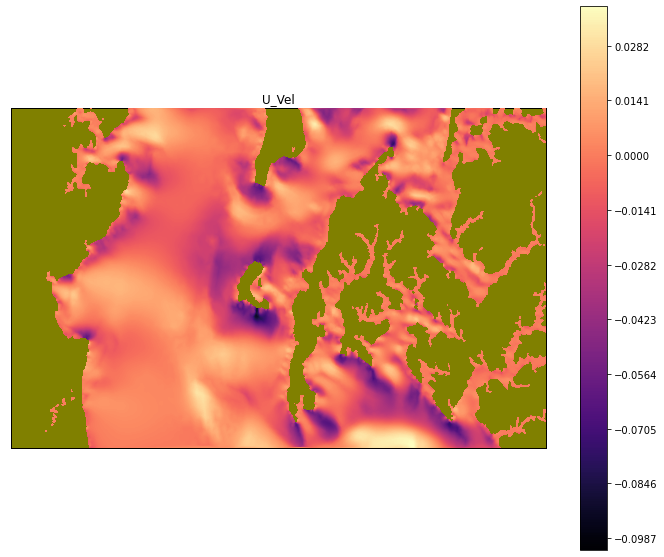

In [7]:
# define fig and ax
fig, ax = plt.subplots(figsize=(12, 10))

# draw map details
m.drawmapboundary(fill_color = 'olive', zorder = 1)

# Plot interpolated u_vel data
m.contourf(xi, yi, ziu, 500, cmap='magma', zorder = 2)
cbar = plt.colorbar()
plt.title('U_Vel')
plt.show()

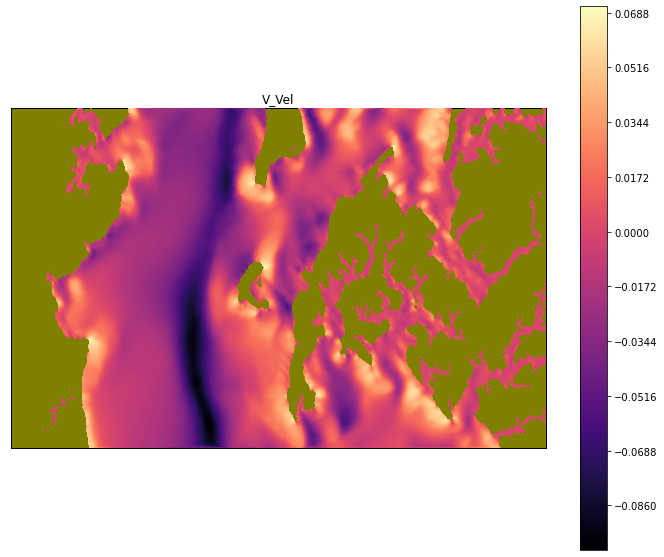

In [8]:
# define fig and ax
fig, ax = plt.subplots(figsize=(12, 10))

# draw map details
m.drawmapboundary(fill_color = 'olive', zorder = 1)

# Plot interpolated v_vel data
m.contourf(xi, yi, ziv, 500, cmap='magma', zorder = 2)
cbar = plt.colorbar()
plt.title('V_Vel')
plt.show()